In [12]:
# mount Google Drive
import pandas as pd
# from google.colab import drive
import seaborn as sns
import matplotlib as plt

In [13]:
# import the drive
# drive.mount('/content/gdrive')

# Exploratory Data Analysis of the 'articles.csv' dataset
We search for missing values, for values we did not expect such as outliers or special values.

In [14]:
# import the csv file, read it and put it into a DataFrame
gdrive_path_articles = '..\\..\\Data\\articles.csv'
articles = pd.read_csv(gdrive_path_articles)
articles = pd.DataFrame(articles)

In [15]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [16]:
# let's check if any values are missing. As we do not yet want to search a specific column we just look at the entire dataframe
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [89]:
articles.max(numeric_only=True)

article_id                    959461001
product_code                     959461
product_type_no                     762
graphical_appearance_no         1010029
colour_group_code                    93
perceived_colour_value_id             7
perceived_colour_master_id           20
department_no                      9989
index_group_no                       26
section_no                           97
garment_group_no                   1025
dtype: int64

In [90]:
articles.min(numeric_only=True)

article_id                    108775015
product_code                     108775
product_type_no                      -1
graphical_appearance_no              -1
colour_group_code                    -1
perceived_colour_value_id            -1
perceived_colour_master_id           -1
department_no                      1201
index_group_no                        1
section_no                            2
garment_group_no                   1001
dtype: int64

Clearly the values are well kept and only the detail description lacks a bit. In total 416 values are missing.
Although the minimum values of some of these numerical columns are -1, which is odd.
Now let's look at the descriptions of the columns. We want to look for anomalies, and values out of the ordinary.

In [69]:
# check for uniqueness in the article IDs
len(articles["article_id"].unique()) == articles.shape[0]

True

In [70]:
# using this we get lots of info about counts, means, deviations, and so forth ...

articles["prod_name"].describe()

count              105542
unique              45875
top       Dragonfly dress
freq                   98
Name: prod_name, dtype: object

In [18]:
# lets look at the description of both the product code and the product type number
articles["product_code"].value_counts()

783707    75
684021    70
699923    52
699755    49
685604    46
          ..
761368     1
761366     1
761360     1
761350     1
959461     1
Name: product_code, Length: 47224, dtype: int64

In [19]:
articles["product_type_no"].value_counts()

272    11169
265    10362
252     9302
255     7904
254     4155
       ...  
525        1
514        1
351        1
349        1
483        1
Name: product_type_no, Length: 132, dtype: int64

In [20]:
articles["product_type_name"].value_counts()

Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

In [72]:
len(articles["product_type_no"].unique()), len(articles["product_type_name"].unique())

(132, 131)

In [73]:
len(articles["product_code"].unique()), len(articles["prod_name"].unique())

(47224, 45875)

In [74]:
len(articles["graphical_appearance_no"].unique()), len(articles["graphical_appearance_name"].unique())

(30, 30)

In [75]:
len(articles["colour_group_code"].unique()), len(articles["colour_group_name"].unique())

(50, 50)

In [79]:
len(articles["perceived_colour_master_id"].unique()), len(articles["perceived_colour_master_name"].unique())

(20, 20)

In [77]:
len(articles["perceived_colour_value_id"].unique()), len(articles["perceived_colour_value_name"].unique())

(8, 8)

In [80]:
len(articles["department_no"].unique()), len(articles["department_name"].unique())

(299, 250)

In [81]:
len(articles["index_code"].unique()), len(articles["index_name"].unique())

(10, 10)

In [82]:
len(articles["index_group_no"].unique()), len(articles["index_group_name"].unique())

(5, 5)

In [83]:
len(articles["section_no"].unique()), len(articles["section_name"].unique())

(57, 56)

In [84]:
len(articles["garment_group_no"].unique()), len(articles["garment_group_name"].unique())

(21, 21)

Some value_counts and graphs

In [91]:
articles["graphical_appearance_name"].value_counts()

Solid                  49747
All over pattern       17165
Melange                 5938
Stripe                  4990
Denim                   4842
Front print             3215
Placement print         3098
Check                   2178
Colour blocking         1830
Lace                    1513
Other structure         1502
Application/3D          1341
Embroidery              1165
Mixed solid/pattern     1132
Glittering/Metallic      958
Jacquard                 830
Sequin                   806
Dot                      681
Treatment                586
Other pattern            515
Contrast                 376
Metallic                 346
Chambray                 322
Slub                     153
Transparent               86
Mesh                      86
Neps                      66
Unknown                   52
Argyle                    15
Hologram                   8
Name: graphical_appearance_name, dtype: int64

In [92]:
articles["colour_group_name"].value_counts()

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [93]:
articles["perceived_colour_value_name"].value_counts()

Dark            42706
Dusty Light     22152
Light           15739
Medium Dusty    12630
Bright           6471
Medium           5711
Undefined         105
Unknown            28
Name: perceived_colour_value_name, dtype: int64

In [94]:
articles["perceived_colour_master_name"].value_counts()

Black              22585
Blue               18469
White              12665
Pink                9403
Grey                8924
Red                 5878
Beige               5657
Green               3526
Khaki green         3181
Yellow              3121
Orange              2734
Brown               2269
Metal               2180
Turquoise           1829
Mole                1223
Lilac Purple        1100
Unknown              685
undefined            105
Yellowish Green        5
Bluish Green           3
Name: perceived_colour_master_name, dtype: int64

In [95]:
articles["department_name"].value_counts()

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

In [96]:
articles["index_name"].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

In [97]:
articles["index_group_name"].value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [98]:
articles["section_name"].value_counts()

Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Accessories      

In [99]:
articles["garment_group_name"].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

Apparently there are not as many product names as there are product codes. From this we can conclude that the names probably correspond to many codes but a code will always denote to a same name. I was not able to test this out yet.

One thing we can notice here is that the length differs with one. We can ask ourselves if we maybe missed a value, but as we have seen earlier, no value is missing.

In [21]:
pr_ty_no = articles["product_type_no"].isna().sum()
pr_ty_na = articles["product_type_name"].isna().sum()

pr_ty_no, pr_ty_na

(0, 0)

---
# Analysing the 'customers.csv' Dataset
first we import the dataset, then we show a little overview.





In [22]:
# import the csv file, read it and put it into a DataFrame
gdrive_path_customers = '..\\..\\Data\\customers.csv'
customers = pd.read_csv(gdrive_path_customers)
customers = pd.DataFrame(customers)

In [23]:
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [24]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [47]:
# amount of rows
cshape = customers.shape[0]
fn_ratio = customers['FN'].isna().sum()/cshape*100
print(f"The ratio of NaN to entries for FN is ({customers['FN'].isna().sum()}/{cshape}) = {fn_ratio}%")

The ratio of NaN to entries for FN is (895050/1371980) = 0.6523783145526902


There is a 65% shortage on entries for the FN column. This may very well result in it not being usable.

In [48]:
active_ratio = customers['Active'].isna().sum()/cshape*100
print(f"The ratio of NaN to entries for Active is ({customers['Active'].isna().sum()}/{cshape}) = {active_ratio}%")

The ratio of NaN to entries for Active is (907576/1371980) = 66.15081852505138%


In [54]:
cms_ratio = customers['club_member_status'].isna().sum()/cshape*100
print(f"The ratio of NaN to entries for club_member_status is ({customers['club_member_status'].isna().sum()}/{cshape}) = {cms_ratio}%")

The ratio of NaN to entries for club_member_status is (6062/1371980) = 0.44184317555649494%


In [55]:
fnf_ratio = customers['fashion_news_frequency'].isna().sum()/cshape*100
print(f"The ratio of NaN to entries for fashion_news_frequency is ({customers['fashion_news_frequency'].isna().sum()}/{cshape}) = {fnf_ratio}%")

The ratio of NaN to entries for fashion_news_frequency is (16009/1371980) = 1.1668537442236768%


In [56]:
age_ratio = customers['age'].isna().sum()/cshape*100
print(f"The ratio of NaN to entries for Age is ({customers['age'].isna().sum()}/{cshape}) = {age_ratio}%")

The ratio of NaN to entries for Age is (15861/1371980) = 1.1560664149623172%


There are even less entries present for the Active column.

In [51]:
# check how much values there are in the club_member_status category
customers["club_member_status"].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [52]:
customers["club_member_status"].describe()

count     1365918
unique          3
top        ACTIVE
freq      1272491
Name: club_member_status, dtype: object

<AxesSubplot: >

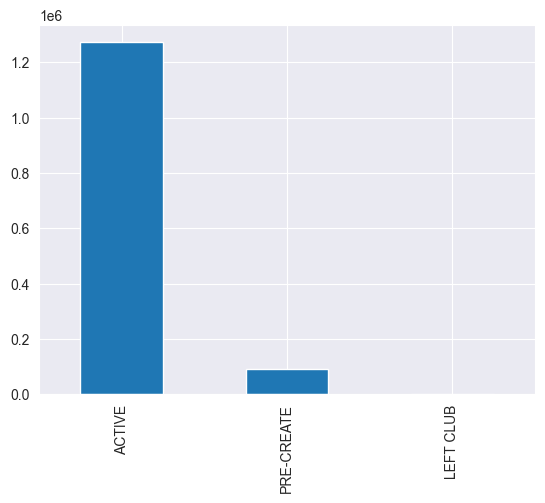

In [58]:
customers["club_member_status"].value_counts().plot.bar()

In [62]:
customers["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [59]:
customers["fashion_news_frequency"].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [60]:
customers["fashion_news_frequency"].describe()

count     1355971
unique          4
top          NONE
freq       877711
Name: fashion_news_frequency, dtype: object

<AxesSubplot: >

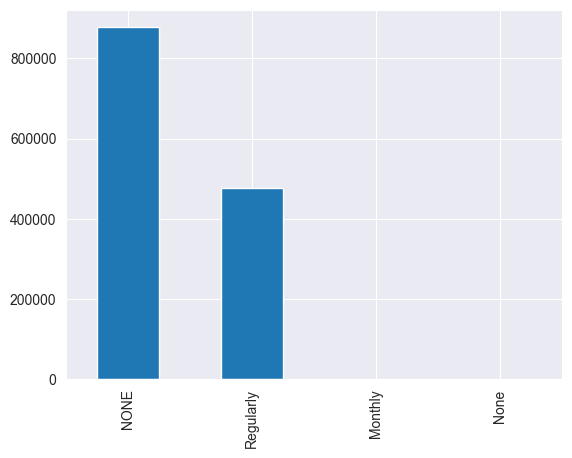

In [61]:
customers["fashion_news_frequency"].value_counts().plot.bar()

In [63]:
customers["fashion_news_frequency"].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [43]:
# the minimum and maximum age of the customers
customers["age"].min(), customers["age"].max()

(16.0, 99.0)

In [45]:
# bar chart of the ages of customers
customers["age"].value_counts()

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: age, Length: 84, dtype: int64

In [46]:
# min and max amount of an age
customers["age"].value_counts().min(), customers["age"].value_counts().max()

(3, 67530)

<AxesSubplot: xlabel='age', ylabel='Count'>

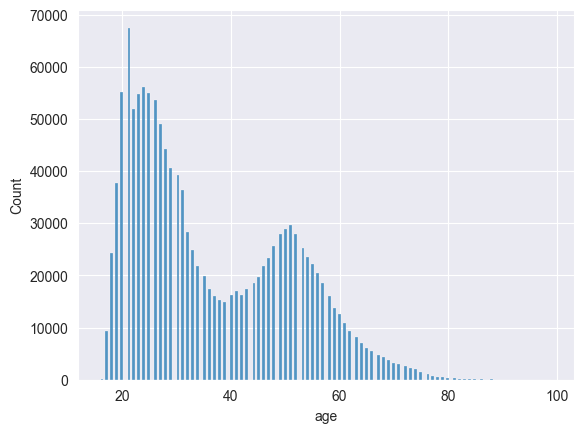

In [50]:
sns.histplot(customers["age"])

In [67]:
# check if there are as many unique customer IDs as there are entrances, in other words, no duplicate customers
len(customers["customer_id"]) == cshape

True

---
# Analysing the 'transactions_train.csv' Dataset
first we import the dataset, then we show a little overview.

In [26]:
# import the csv file, read it and put it into a DataFrame
gdrive_path_transactions = '..\\..\\Data\\transactions_train.csv'
transactions = pd.read_csv(gdrive_path_transactions)
transactions = pd.DataFrame(transactions)

In [27]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [33]:
# check if any column has any missing values.
transactions.isna().any()

t_dat               False
customer_id         False
article_id          False
price               False
sales_channel_id    False
dtype: bool

Clearly no values are missing, this is ideal. No actions are to be taken.

In [35]:
transactions["sales_channel_id"].value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

<AxesSubplot: >

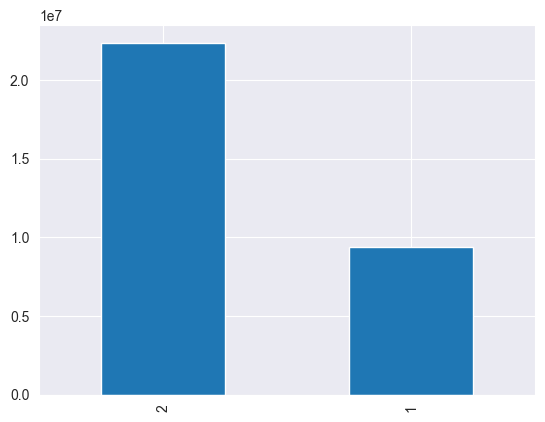

In [36]:
transactions["sales_channel_id"].value_counts().plot.bar()

There is one channel which is clearly more successful

In [42]:
transactions["price"].min(), transactions["price"].max()

(1.694915254237288e-05, 0.5915254237288136)

In [39]:
transactions["t_dat"].min(), transactions["t_dat"].max()

('2018-09-20', '2020-09-22')

Some weird values in the price column. The date is very useful in some cases such as the most popular in a month for example.
For this to work we need to reduce to months instead of keeping the date exact to the day.

<AxesSubplot: >

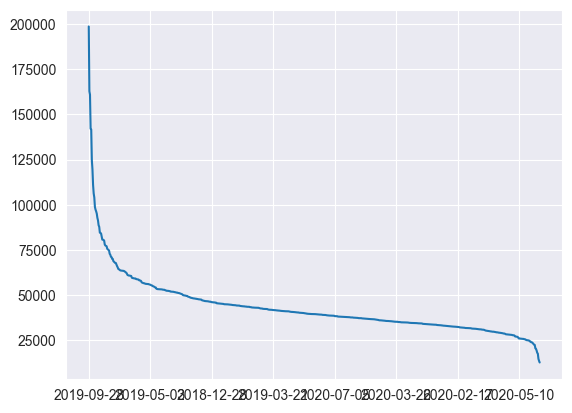

In [41]:
transactions["t_dat"].value_counts().plot.line()

In [66]:
trans_shape = transactions.shape[0]
trans_shape

31788324